In [1]:
import numpy as np
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import matplotlib.pyplot as plt

In [13]:
X_train = np.loadtxt(r'C:\Users\KIMAYA\Downloads\input.csv',delimiter = ',')
Y_train = np.loadtxt(r'C:\Users\KIMAYA\Downloads\labels.csv',delimiter = ',')

X_test = np.loadtxt(r'C:\Users\KIMAYA\Downloads\input_test.csv',delimiter = ',')
Y_test = np.loadtxt(r'C:\Users\KIMAYA\Downloads\labels_test.csv',delimiter = ',')

In [14]:
print("Shape of X_train", X_train.shape)
print("Shape of Y_train", Y_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of Y_test", Y_test.shape)

Shape of X_train (2000, 30000)
Shape of Y_train (2000,)
Shape of X_test (400, 30000)
Shape of Y_test (400,)


In [3]:

X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)
X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0 

In [4]:
type(X_train)

numpy.ndarray

In [5]:
print("Shape of X_train", X_train.shape)
print("Shape of Y_train", Y_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of Y_test", Y_test.shape)

Shape of X_train (2000, 100, 100, 3)
Shape of Y_train (2000, 1)
Shape of X_test (400, 100, 100, 3)
Shape of Y_test (400, 1)


In [6]:
X_train

array([[[[0.14509804, 0.15294118, 0.09803922],
         [0.10196078, 0.09411765, 0.03529412],
         [0.13333333, 0.09803922, 0.03921569],
         ...,
         [0.22352941, 0.17254902, 0.1372549 ],
         [0.23921569, 0.18431373, 0.14901961],
         [0.25490196, 0.2       , 0.16470588]],

        [[0.17647059, 0.16862745, 0.10980392],
         [0.10980392, 0.09803922, 0.03137255],
         [0.20392157, 0.15686275, 0.09411765],
         ...,
         [0.21176471, 0.16078431, 0.1254902 ],
         [0.22352941, 0.16862745, 0.13333333],
         [0.23921569, 0.18431373, 0.14901961]],

        [[0.20392157, 0.17647059, 0.10196078],
         [0.1254902 , 0.09411765, 0.01960784],
         [0.27058824, 0.21176471, 0.1372549 ],
         ...,
         [0.21176471, 0.15686275, 0.11372549],
         [0.21960784, 0.16470588, 0.12156863],
         [0.23137255, 0.17647059, 0.13333333]],

        ...,

        [[0.07843137, 0.15294118, 0.        ],
         [0.39607843, 0.49019608, 0.2627451 ]

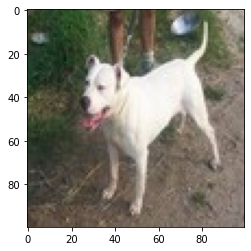

In [7]:
idx = random.randint(0,len(X_train)) 
plt.imshow(X_train[idx, :])
plt.show()

In [8]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100,100,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64,activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [9]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [10]:
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam', metrics =['accuracy'])

In [11]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 14s 445ms/step - loss: 0.7614 - accuracy: 0.5090
Epoch 2/5
32/32 [==============================] - 14s 443ms/step - loss: 0.6766 - accuracy: 0.5610
Epoch 3/5
32/32 [==============================] - 14s 442ms/step - loss: 0.6543 - accuracy: 0.5955
Epoch 4/5
32/32 [==============================] - 15s 470ms/step - loss: 0.6151 - accuracy: 0.6650
Epoch 5/5
32/32 [==============================] - 15s 460ms/step - loss: 0.5571 - accuracy: 0.7265


In [41]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 64ms/step - loss: 0.7413 - accuracy: 0.6475


[0.7412744760513306, 0.6474999785423279]

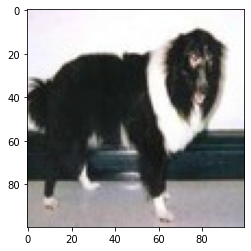

Our model says it is a : dog


In [65]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2,:])
plt.show()

Y_pred = model.predict(X_test[idx2, :].reshape(1,100,100,3))
Y_pred = Y_pred >0.5

if(Y_pred == 0):
    pred = 'dog'
    
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)